In [2]:
pip install pandas matplotlib seaborn

     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ---------------------------------------- 60.8/60.8 kB 1.6 MB/s eta 0:00:00
     ---------------------------------------- 0.0/104.6 kB ? eta -:--:--
     -------------------------------------- 104.6/104.6 kB 5.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.6 MB 14.9 MB/s eta 0:00:01
   -- ------------------------------------- 0.8/11.6 MB 8.4 MB/s eta 0:00:02
   ---- ----------------------------------- 1.4/11.6 MB 10.0 MB/s eta 0:00:02
   ------ --------------------------------- 1.9/11.6 MB 11.1 MB/s eta 0:00:01
   -------- ------------------------------- 2.4/11.6 MB 10.9 MB/s eta 0:00:01
   --------- ------------------------------ 2.9/11.6 MB 10.7 MB/s eta 0:00:01
   ----------- ---------------------------- 3.4/11.6 MB 10.8 MB/s eta 0:00:01
   ------------- -------------------------- 3.9/11.6 MB 11.0 MB/s eta 0:00:01
  


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\pedro\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Configurando padrão de visualização limitando tamanho dos gráficos da biblioteca matplot

sns.set(style='whitegrid')
plt.rcParams["figure.figsize"] = (12,16)

In [3]:
df = pd.read_csv('../data/Telemetria_de_M_ltiplas_Bombas.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.head()


,timestamp,pump_id,pressure_in,pressure_out,vibration,temperature,rpm,flow_rate,power_consumption
0,2024-01-01 00:00:00,pump_001,5.392593,9.525054,1.503521,79.396536,1826.510709,43.211838,15.256310
1,2024-01-01 00:15:00,pump_001,4.111160,9.786150,1.658232,75.196546,1753.947658,49.366054,15.018383
2,2024-01-01 00:30:00,pump_001,5.357373,9.581833,1.016699,70.438372,1766.181328,55.768843,14.353267
3,2024-01-01 00:45:00,pump_001,4.883138,10.077293,1.224031,72.687504,1742.397483,50.343257,14.996210
4,2024-01-01 01:00:00,pump_001,5.353729,10.838025,1.455546,76.714267,1991.725953,54.695445,15.736262


In [4]:
df.info()
df.describe()
df['pump_id'].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   timestamp          3000 non-null   datetime64[ns]
 1   pump_id            3000 non-null   object        
 2   pressure_in        3000 non-null   float64       
 3   pressure_out       3000 non-null   float64       
 4   vibration          3000 non-null   float64       
 5   temperature        3000 non-null   float64       
 6   rpm                3000 non-null   float64       
 7   flow_rate          3000 non-null   float64       
 8   power_consumption  3000 non-null   float64       
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 211.1+ KB


pump_id
pump_001    1000
pump_002    1000
pump_003    1000
Name: count, dtype: int64

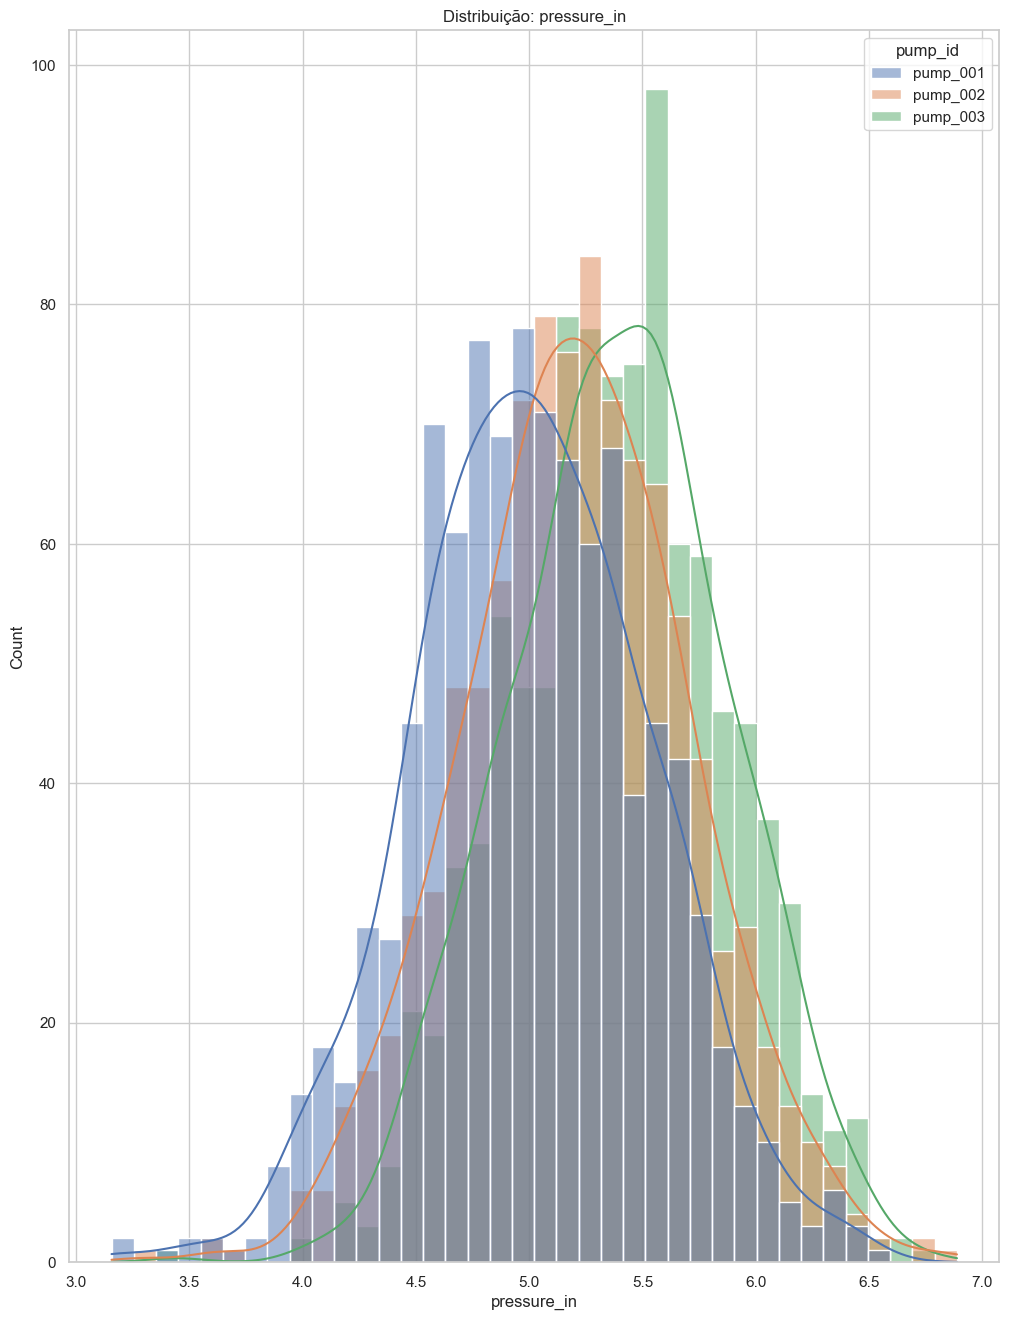

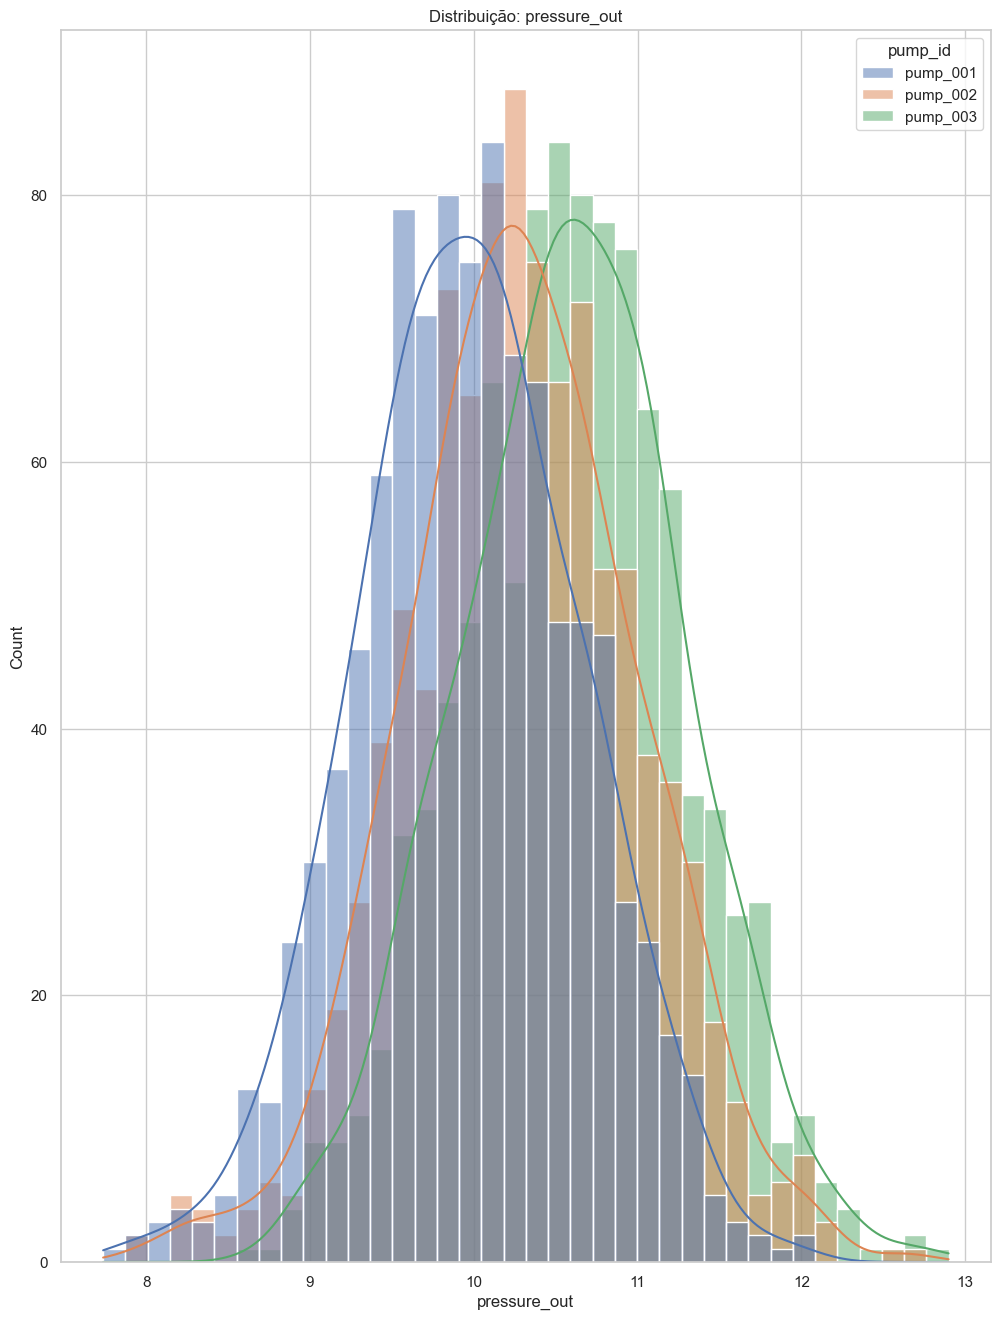

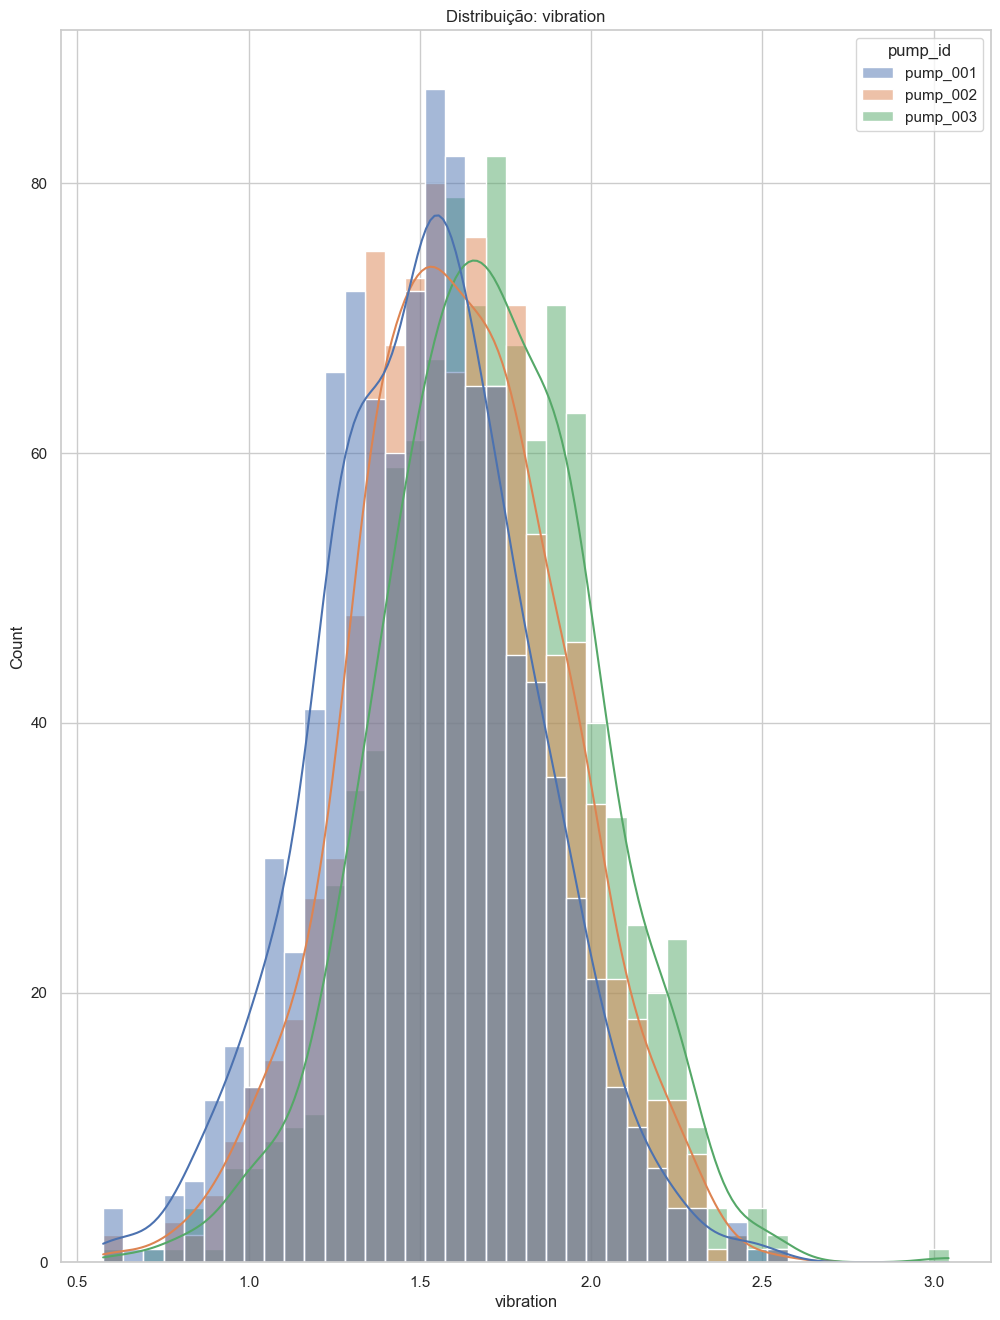

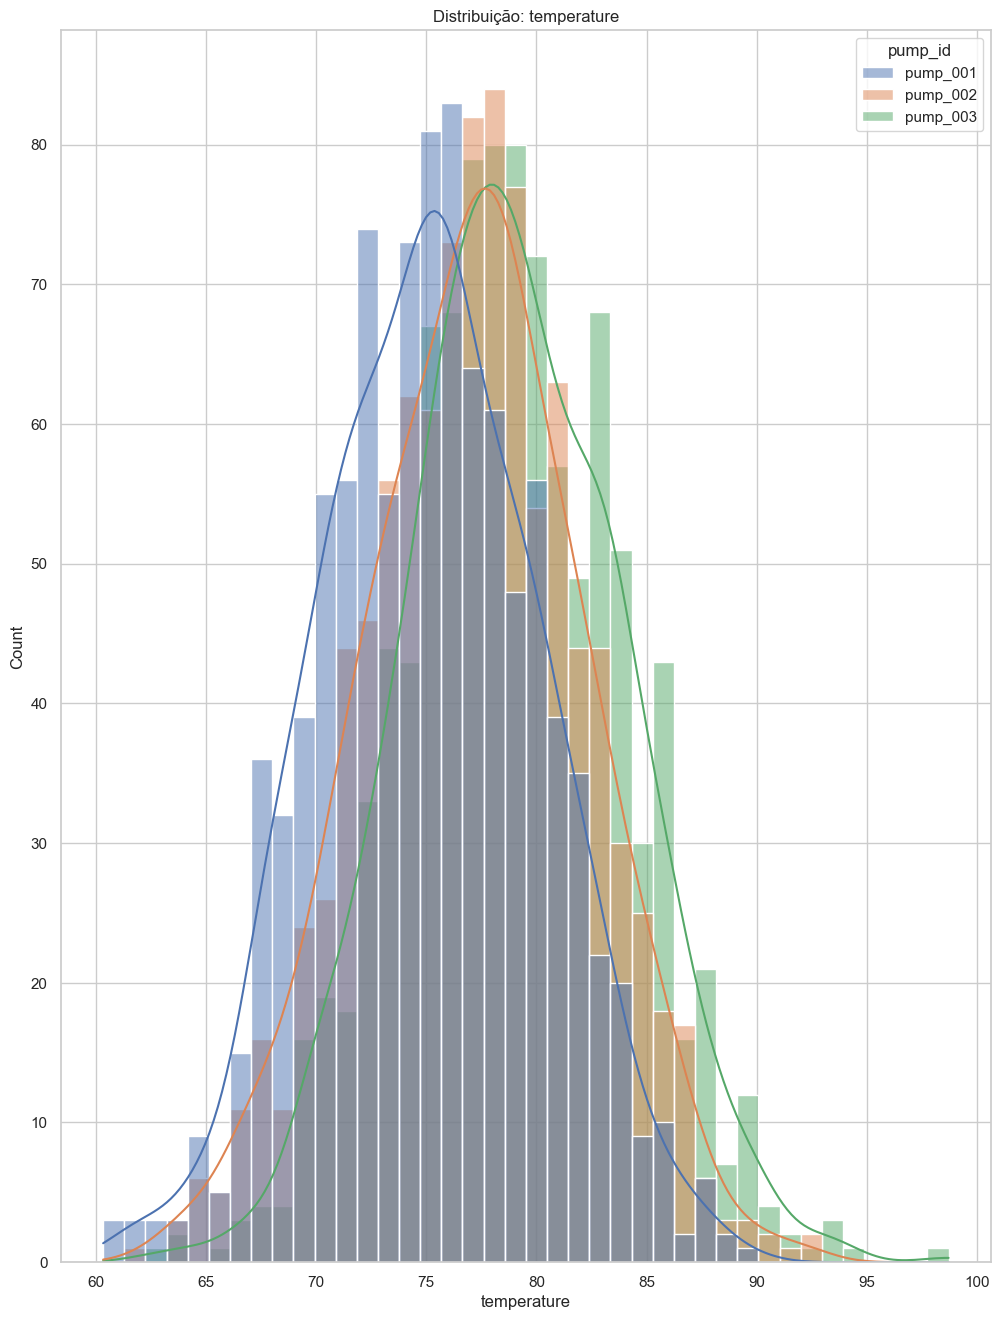

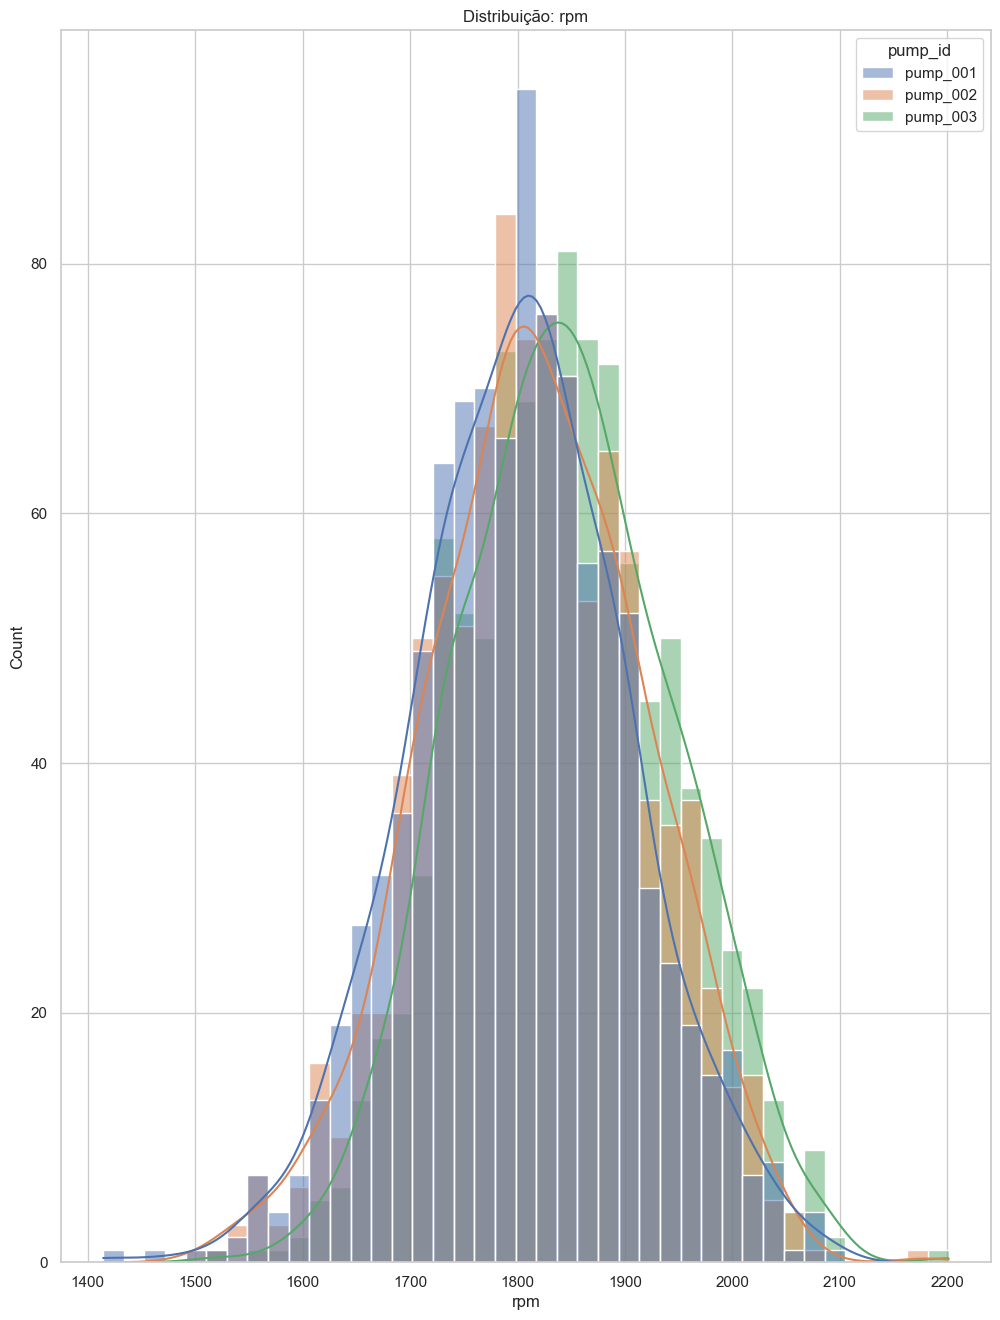

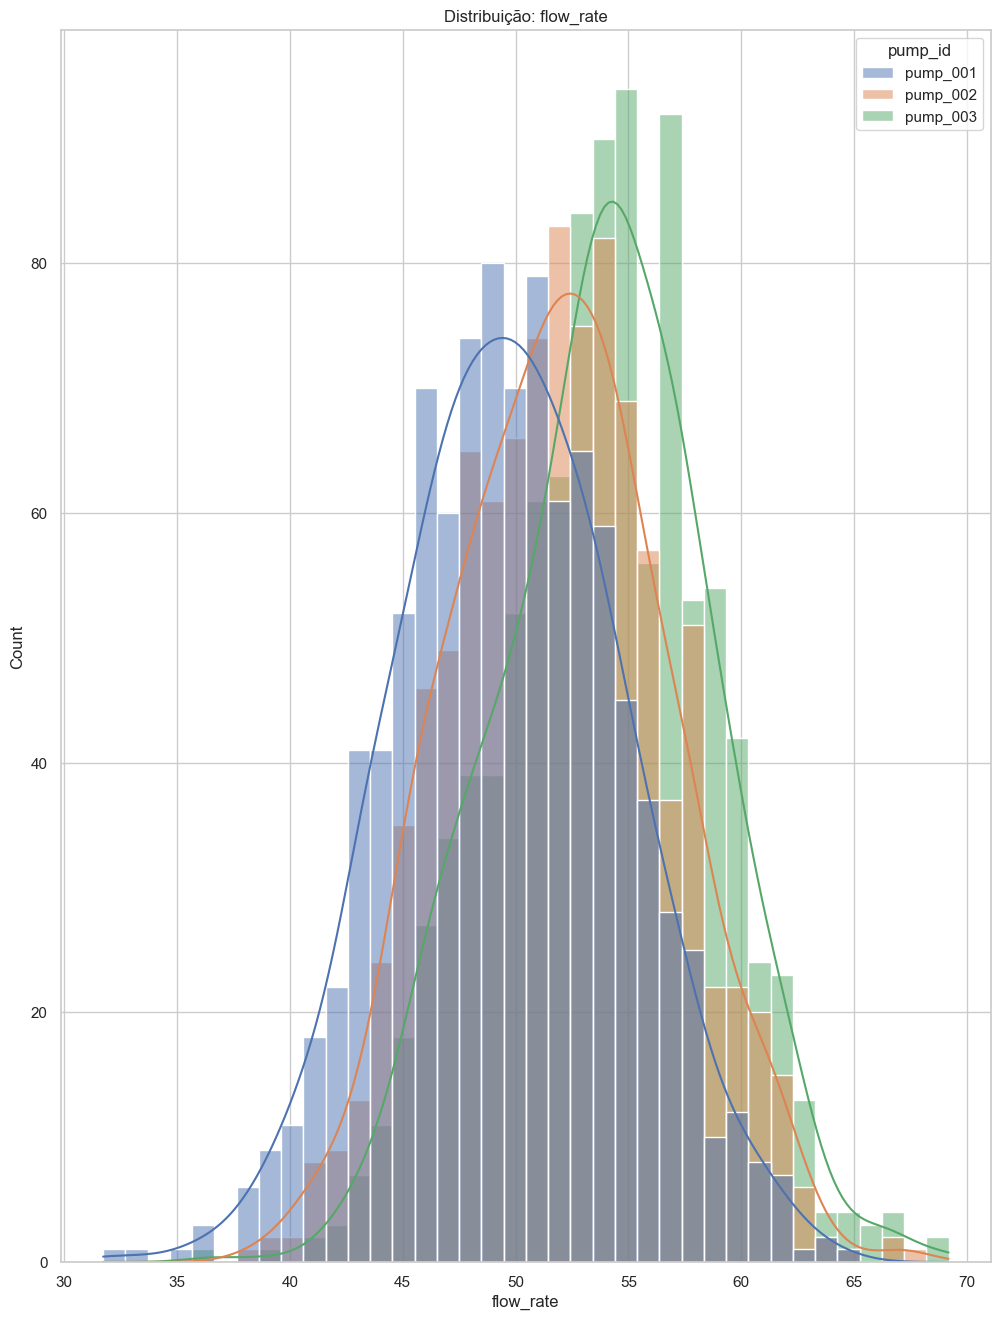

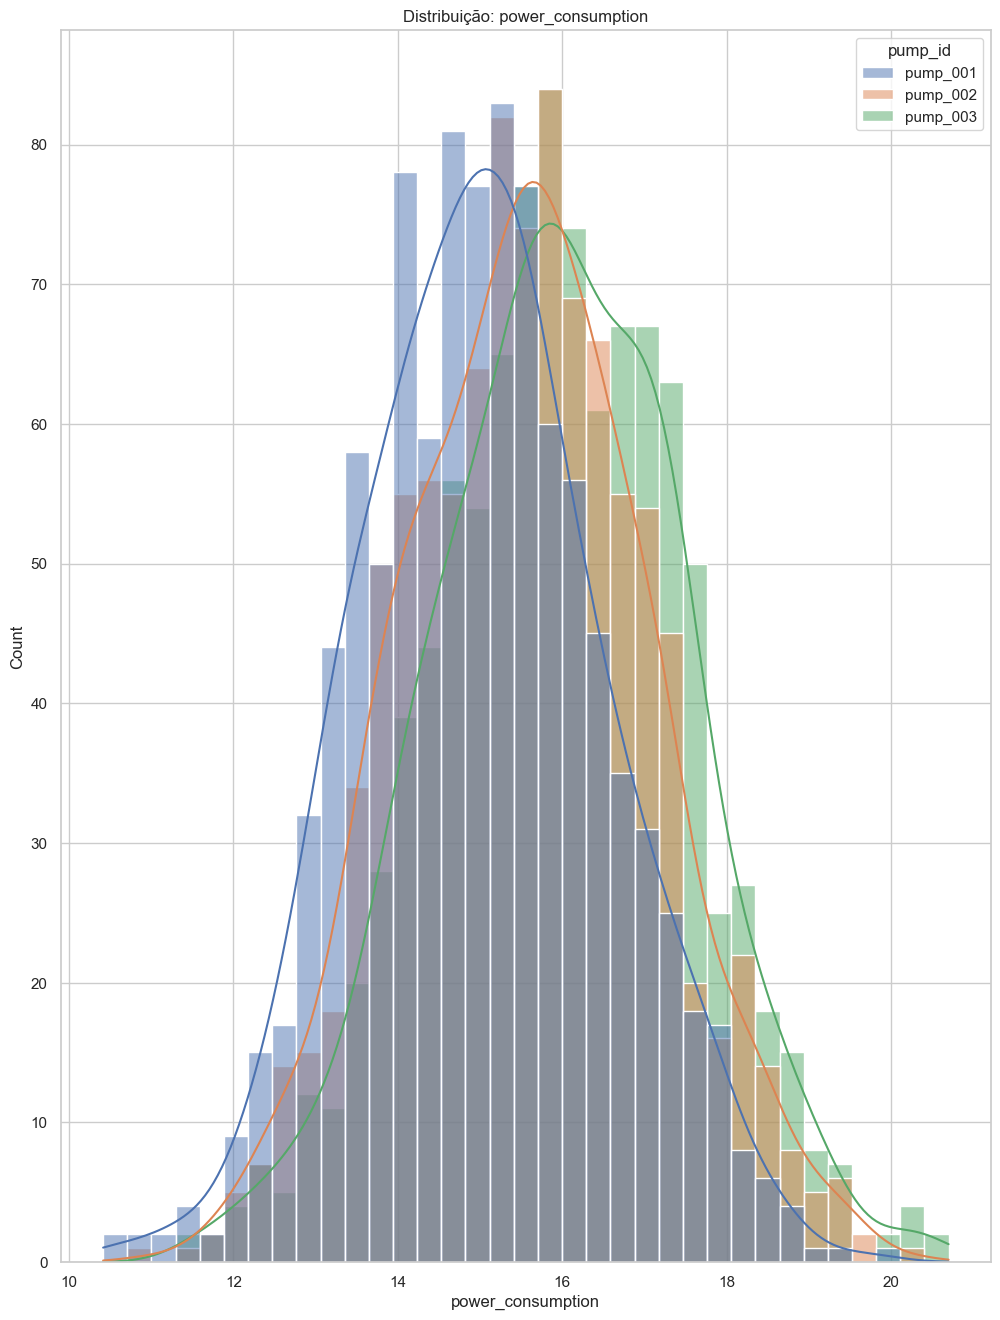

In [5]:
cols = ['pressure_in', 'pressure_out', 'vibration', 'temperature', 'rpm', 'flow_rate', 'power_consumption']

for col in cols:
    sns.histplot(data=df, x=col, hue='pump_id', kde=True)
    plt.title(f'Distribuição: {col}')
    plt.show()


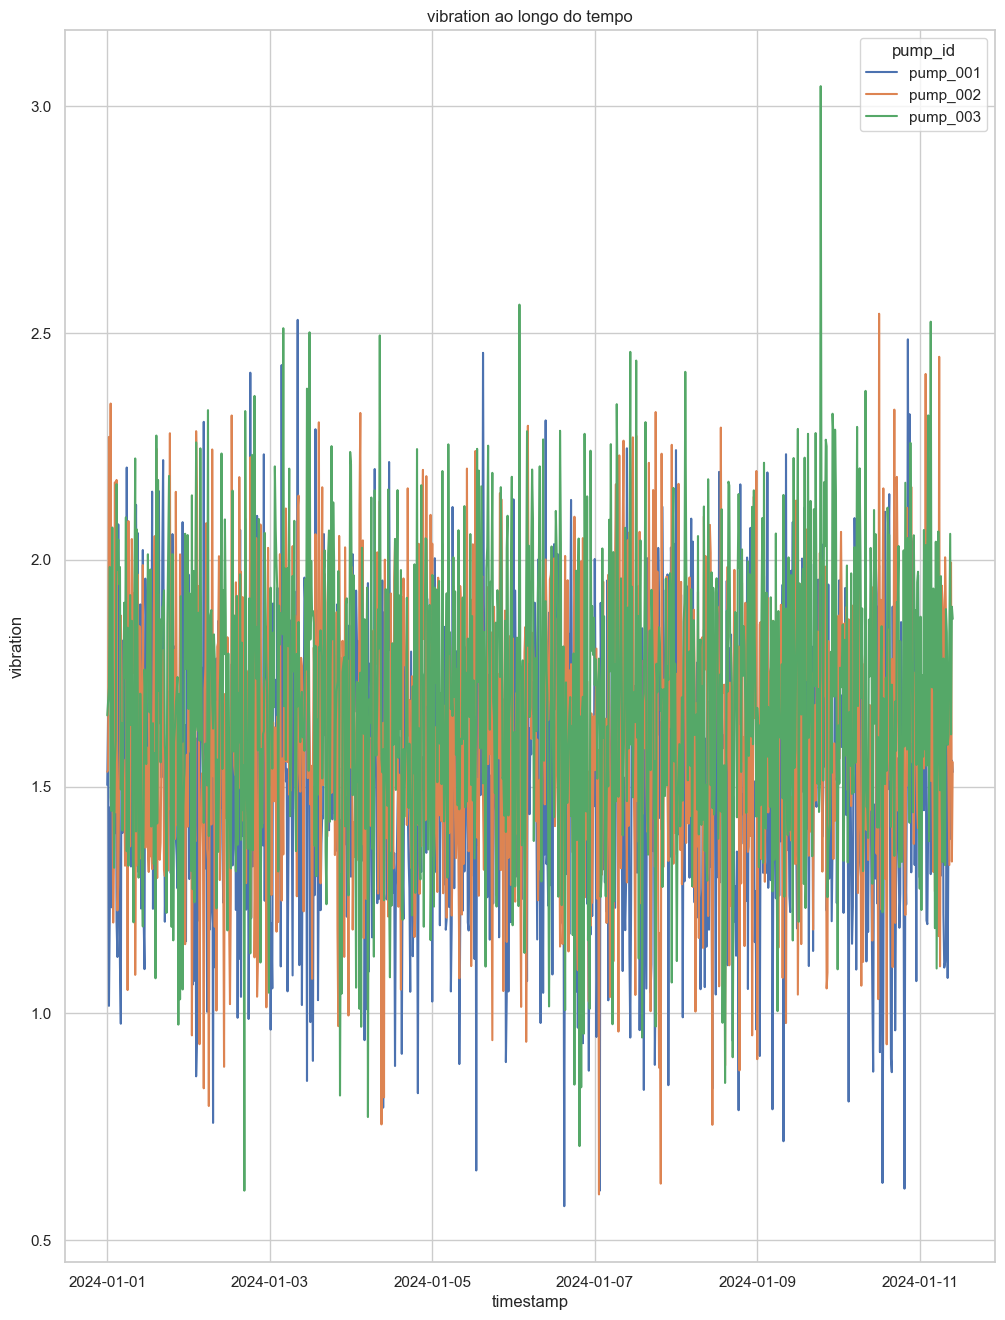

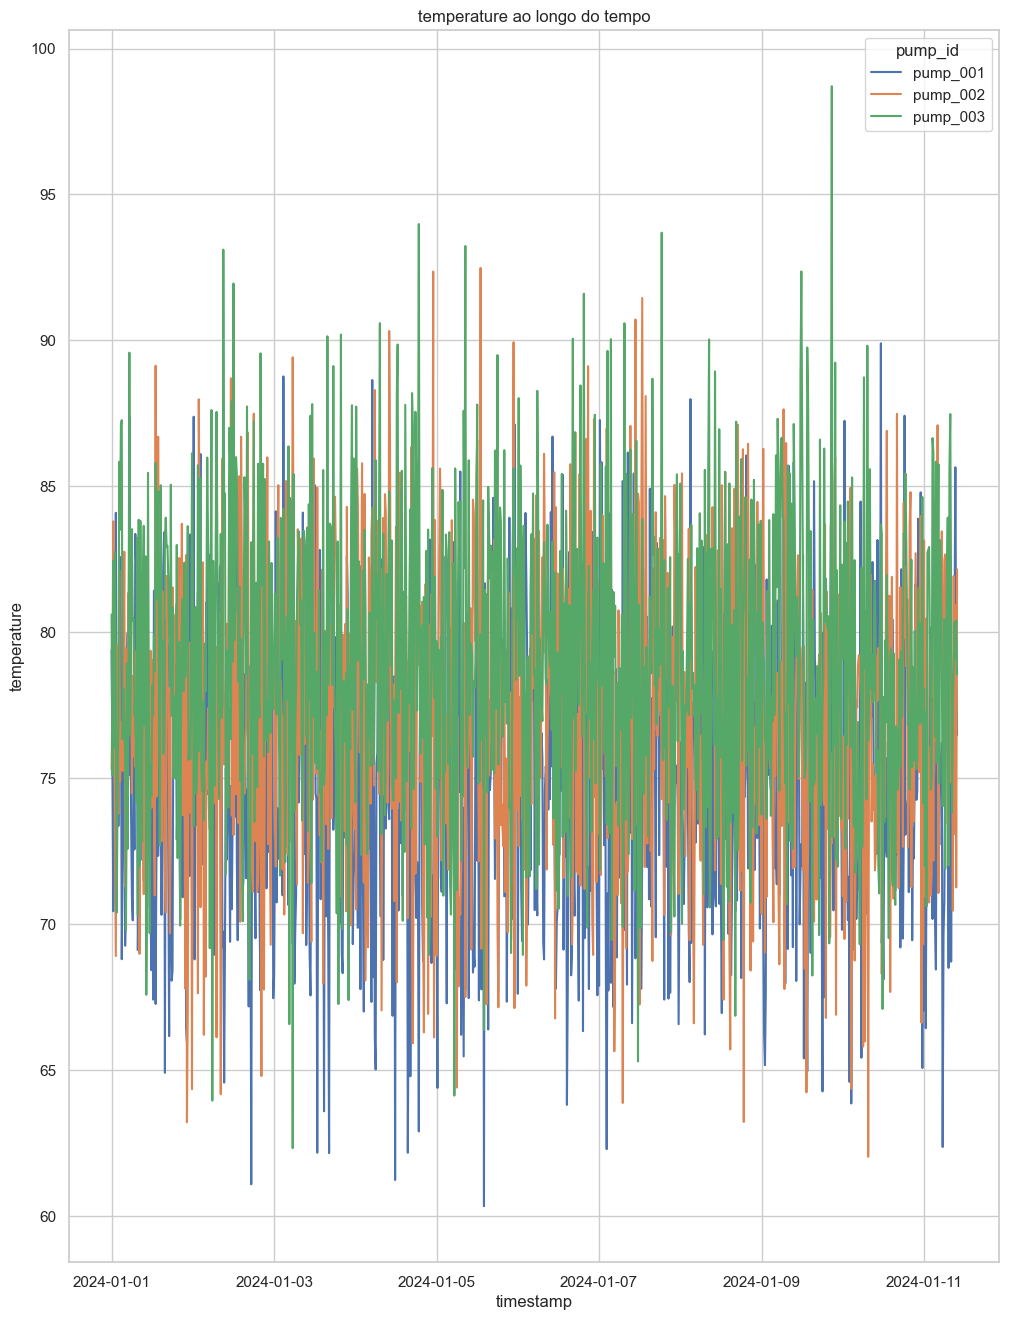

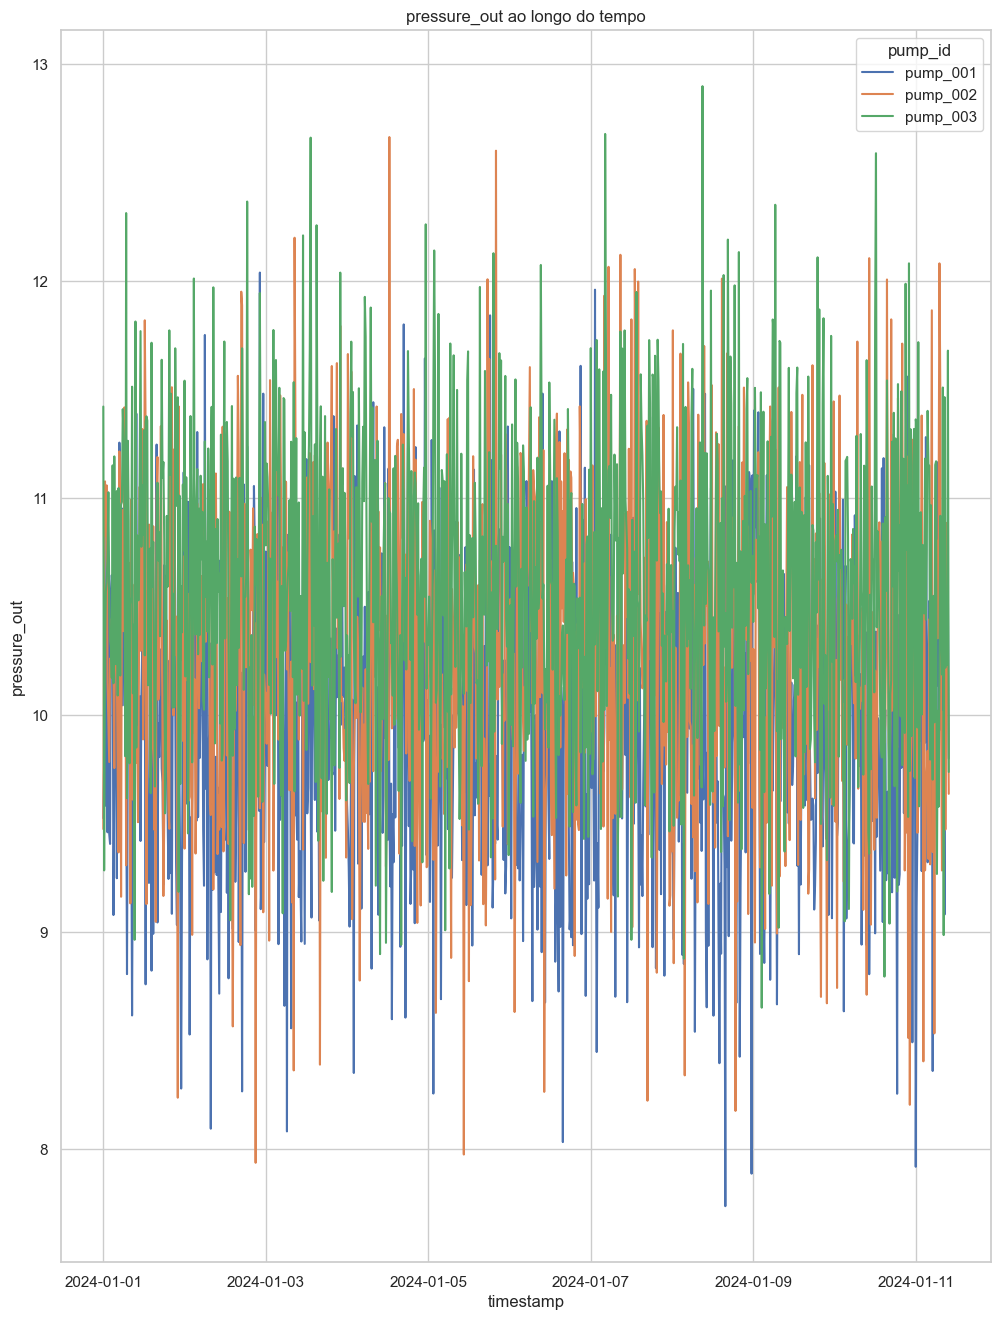

In [6]:
for col in ['vibration', 'temperature', 'pressure_out']:
    sns.lineplot(data=df, x='timestamp', y=col, hue='pump_id')
    plt.title(f'{col} ao longo do tempo')
    plt.show()


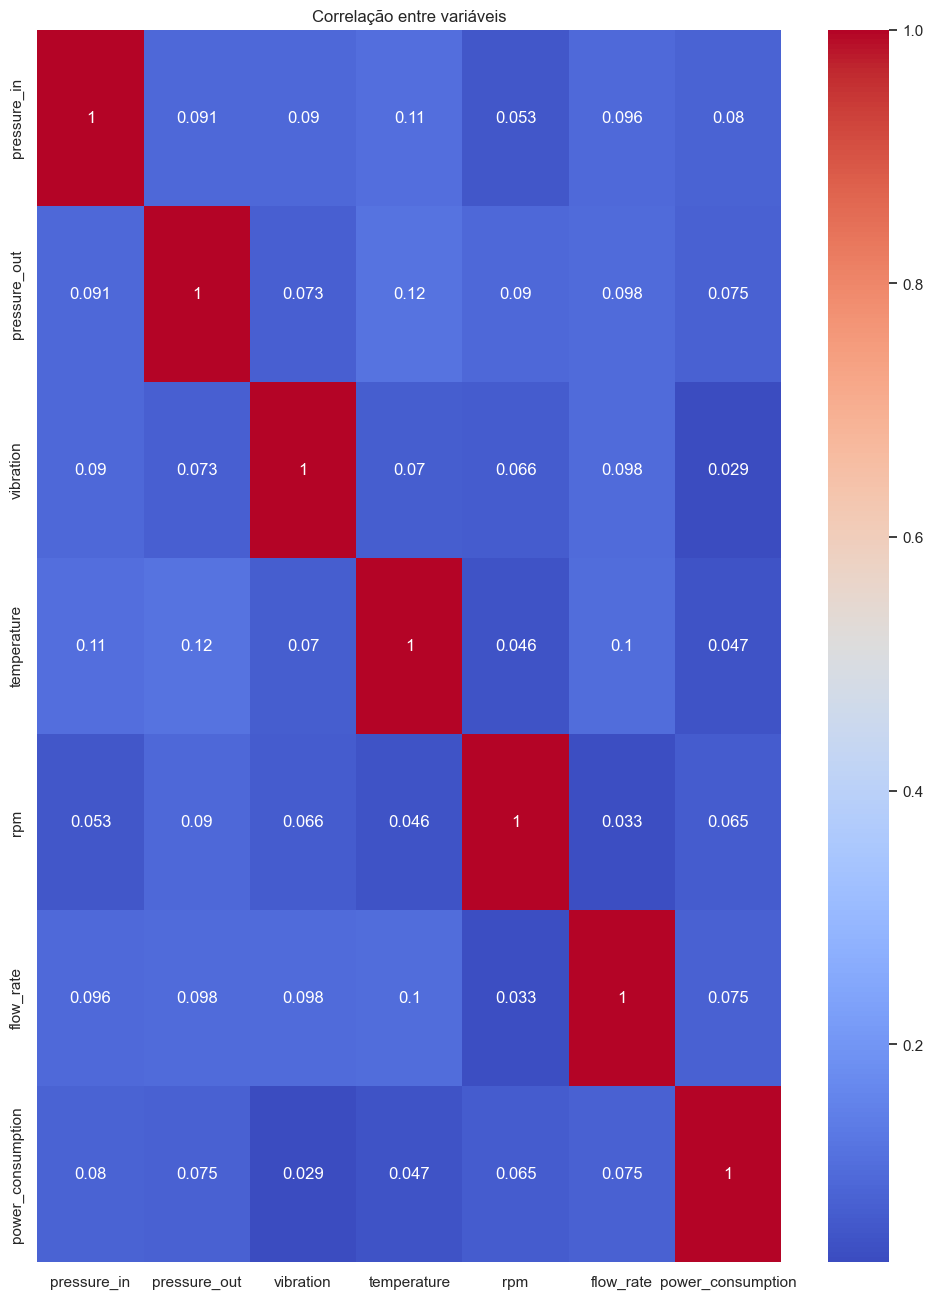

In [7]:
corr = df[cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlação entre variáveis')
plt.show()


Correlacionando variáveis para: pump_001


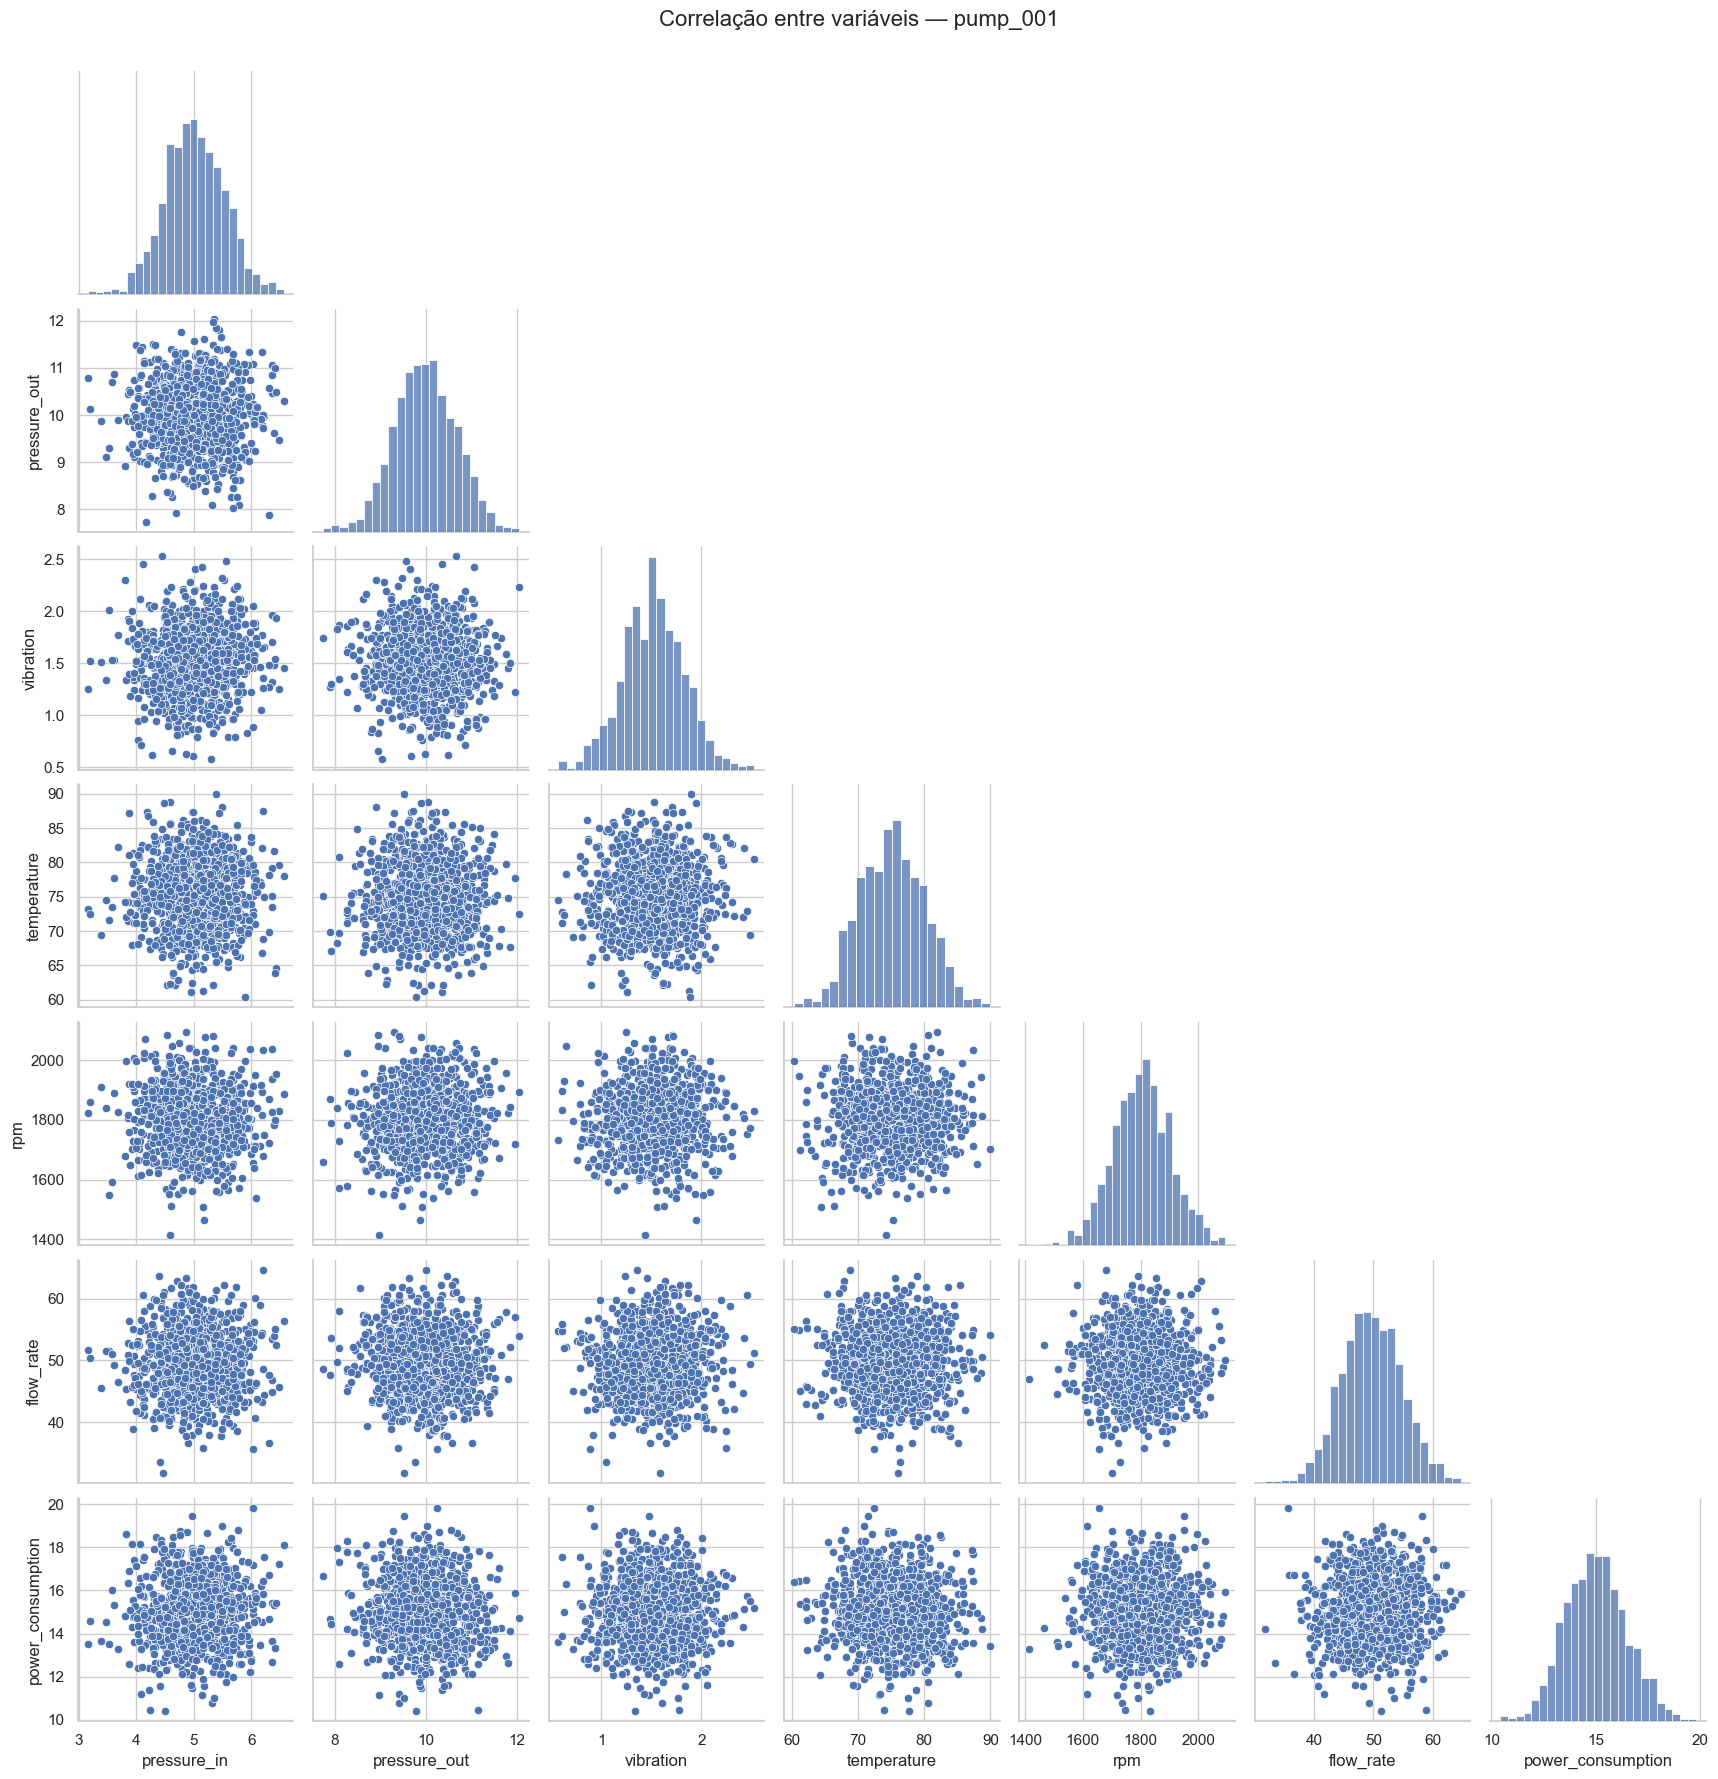

Correlacionando variáveis para: pump_002


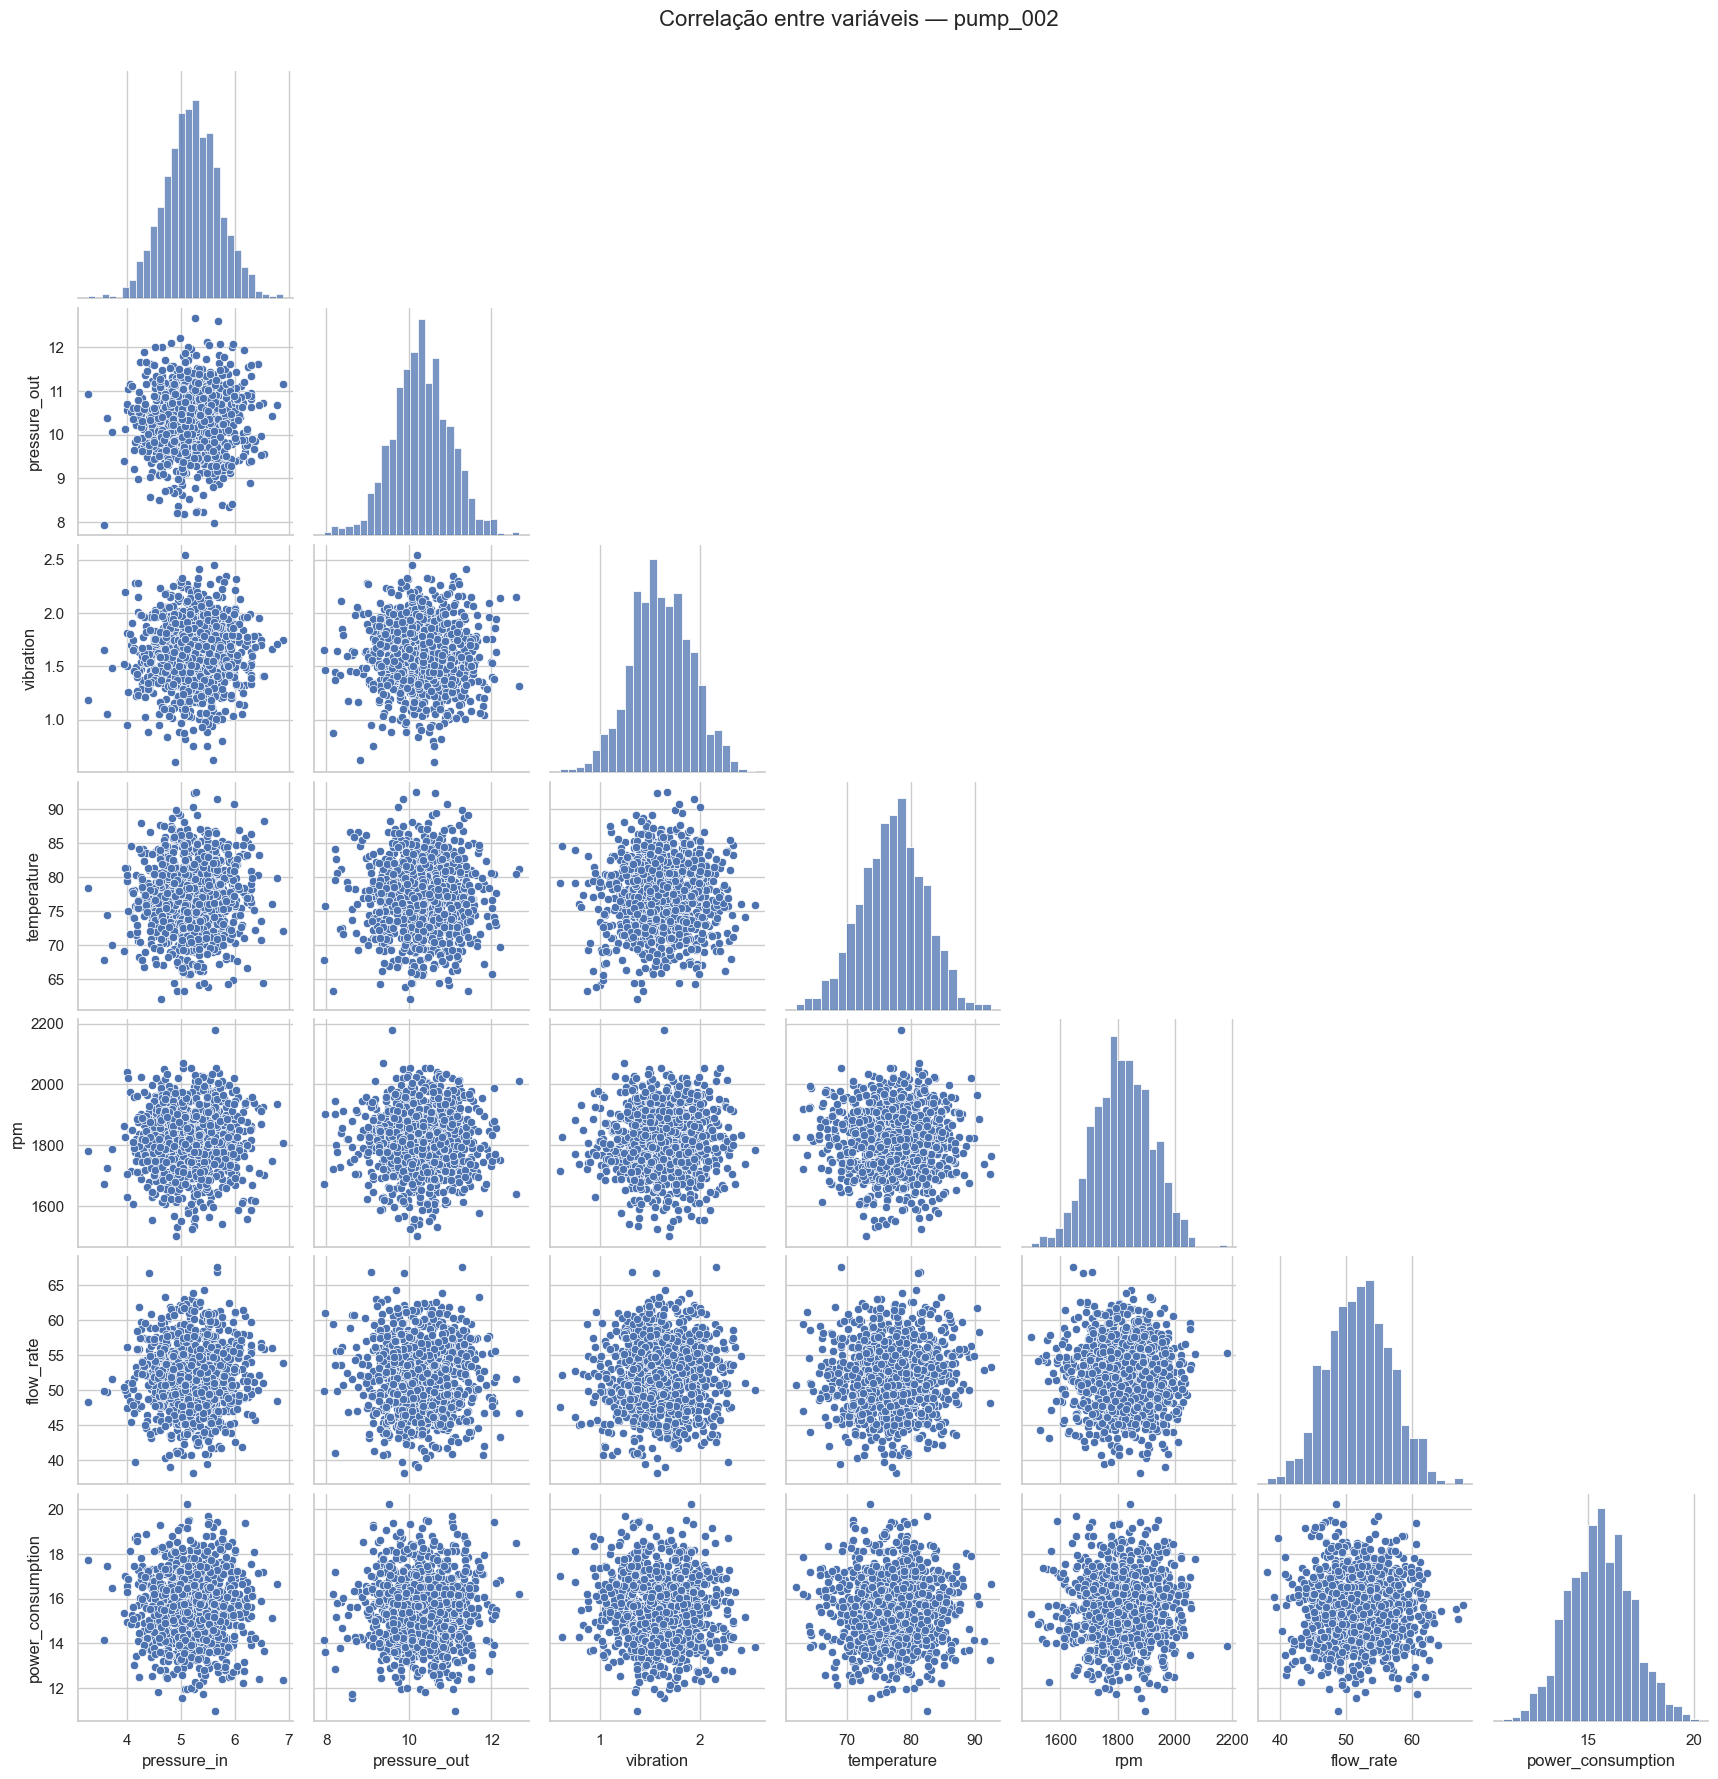

Correlacionando variáveis para: pump_003


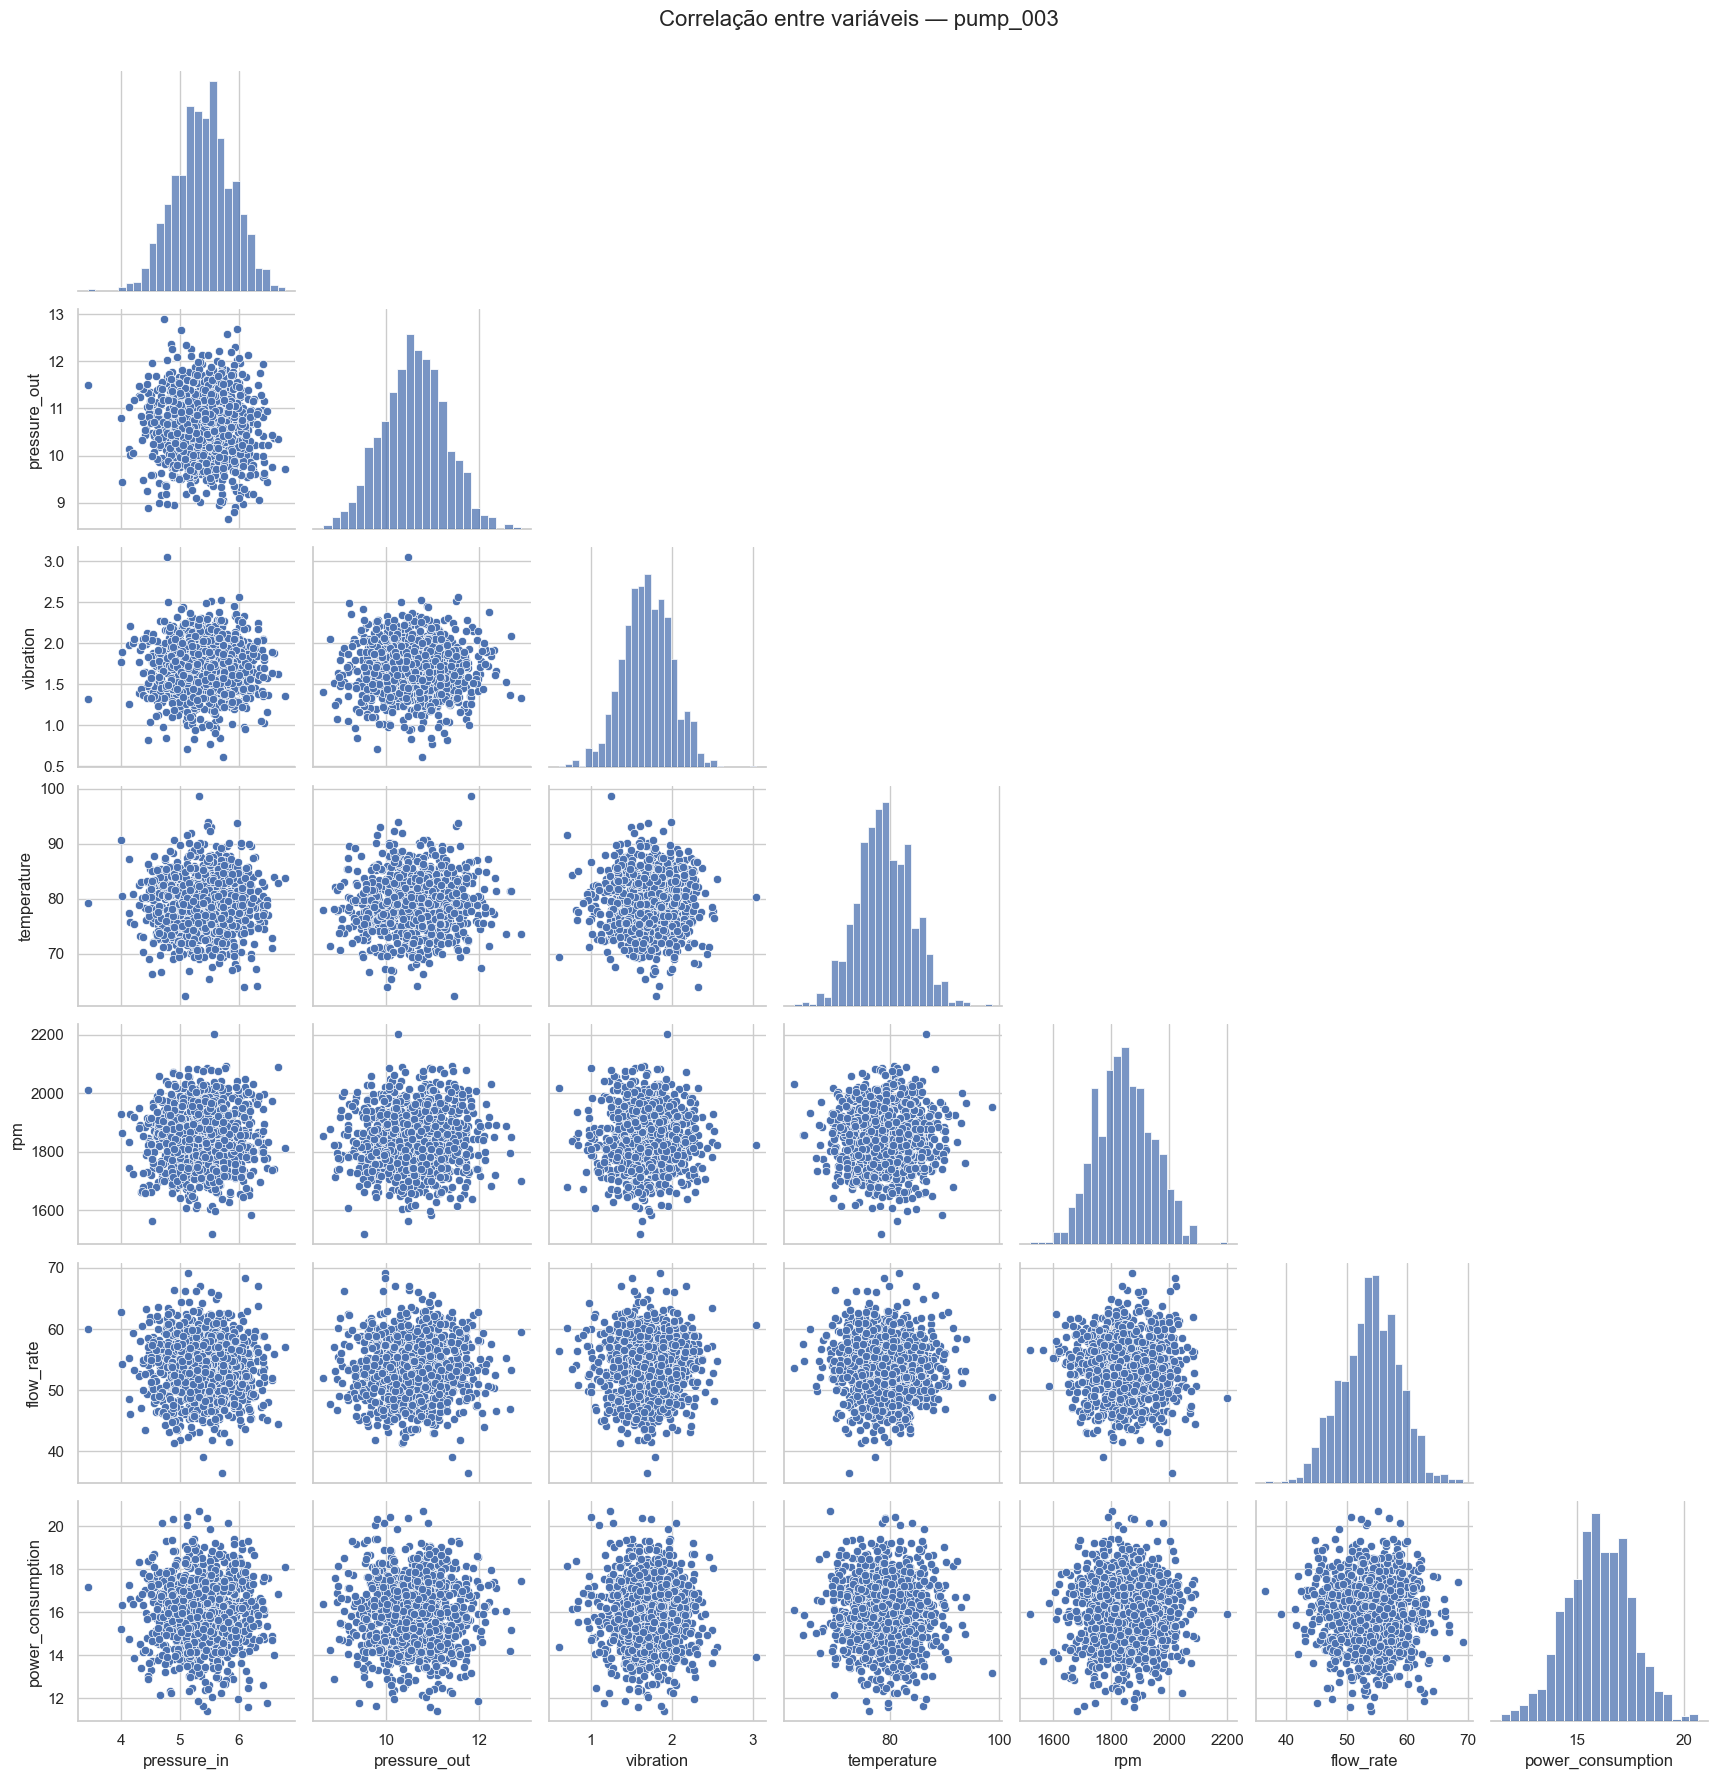

In [12]:
pump_ids = ['pump_001', 'pump_002', 'pump_003']
for pid in pump_ids:
    print(f'Correlacionando variáveis para: {pid}')
    sns.pairplot(df[df['pump_id'] == pid][cols], corner=True)
    plt.suptitle(f'Correlação entre variáveis — {pid}', y=1.02, fontsize=16)
    plt.show()

#Neste caso por serem dados fictícios, não temos forte correlação entre os dados, existiria caso uma curva ascendente ou descendente confirmasse pearson no caso de nuvem como observado não temos
#correlação 